<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bibliography" data-toc-modified-id="Bibliography-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bibliography</a></span></li><li><span><a href="#Minimization-of-a-function-$f(x)$-using-the-derivative-==-0" data-toc-modified-id="Minimization-of-a-function-$f(x)$-using-the-derivative-==-0-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Minimization of a function $f(x)$ using the derivative == 0</a></span></li><li><span><a href="#Minimization-of-a-function-$f(x)$-using-the-Gradient-Descend-Algorithm-(GDA)" data-toc-modified-id="Minimization-of-a-function-$f(x)$-using-the-Gradient-Descend-Algorithm-(GDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Minimization of a function $f(x)$ using the Gradient Descend Algorithm (GDA)</a></span></li></ul></div>

## Bibliography
1. https://web.stanford.edu/~boyd/cvxbook/

## Minimization of a function $f(x)$ using the derivative == 0

Let

$$
f(x) = x^2-3x+2.
$$

To find $x^*=arg min f(x)$ we must solve $f'(x)=0$.

$$
f'(x) = 2x^*-3 = 0; x^*=2/3.
$$

To find the minimum value of $f$ we evaluate it at $x^*$, obtaining
$$
f(x^*) = -1/4.
$$

## Minimization of a function $f(x)$ using the Gradient Descend Algorithm (GDA)
The GDA is an iterative algorithm based on the displacement of $x$ in the oposite direction of the gradient vector $\nabla f$ (the gradient). Basically:

\begin{equation}
x_{(k+1)} = x_{(k)} - \alpha_{(k)}\nabla f(x_{(k)}),
\end{equation}

where $x_{(k)}$ is the value of $x^*$ at the iteration $k$ of the GDA, and $\alpha_{(k)}$ is the *learning rate*.

The smaller the $\alpha_{(k)}$, the better the solution, but the slower the algorithm. In order to keep as high as possible the speed of convergence but, at the same time, have enough accuracy, if

\begin{equation}
f(x_{(k+1)})>f(x_{(k)}),
\end{equation}

(this would mean that we have "crossed the valley and we are asceding again") then

$$
\alpha_{(k+1)} = \alpha_{(k)}/2.
$$
This behaviour is called *Backtracking*.

GDA stops if $\alpha_{(k+1)}<\alpha_{\text{min}}$ or if $\nabla f == 0$.

Notice that $f(x)$ should be convex in order to found a global minimum, which means that $\nabla^2f$ (the Hessian of $f$) is a positive definite matrix, i.e., all the eigenvalues of $\nabla^2f$ must be larger than 0.

In [1]:
def GDA(min_learning_rate = 1e-3, initial_argmin = 1.0):
    learning_rate = 1.0
    argmin = initial_argmin
    iters = 0
    print("{:>6}{:>10}{:>10}{:>10}{:>10}{:>10}".format("iters", "argmin", "f(amin)", "f'(amin)", "rate", "min_rate"))
    while(learning_rate > min_learning_rate):
        iters += 1
        _gradient_f = gradient_f(argmin)
        print(f"{iters:>6}{argmin:>10.6f}{f(argmin):>10.6f}{_gradient_f:>10.6f}{learning_rate:>10.6f}{min_learning_rate:>10.6}")
        if _gradient_f == 0.0:
            print("minimum found")
            break
        prev_argmin = argmin
        argmin = argmin - learning_rate * _gradient_f
        if f(argmin) >= f(prev_argmin):
            learning_rate /= 2.0
    return argmin, f(argmin)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

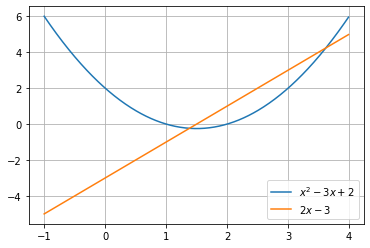

In [3]:
# Example: minimization of f(x) = x^2-3x+2

def f(x):
    return x**2-3*x+2

def gradient_f(x):
    return 2*x-3

xvals = np.arange(-1, 4, 0.01)
yvals = f(xvals)
plt.plot(xvals, yvals, label="$x^2-3x+2$")
yvals2 = gradient_f(xvals)
plt.plot(xvals, yvals2, label="$2x-3$")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
print(GDA())

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1  1.000000  0.000000 -1.000000  1.000000     0.001
     2  2.000000  0.000000  1.000000  0.500000     0.001
     3  1.500000 -0.250000  0.000000  0.500000     0.001
minimum found
(1.5, -0.25)


In [5]:
print(GDA(min_learning_rate = 1e-5, initial_argmin = 10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1 10.000000 72.000000 17.000000  1.000000     1e-05
     2 -7.000000 72.000000-17.000000  0.500000     1e-05
     3  1.500000 -0.250000  0.000000  0.500000     1e-05
minimum found
(1.5, -0.25)


In [6]:
print(GDA(min_learning_rate = 1e-2, initial_argmin = -10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1-10.000000132.000000-23.000000  1.000000      0.01
     2 13.000000132.000000 23.000000  0.500000      0.01
     3  1.500000 -0.250000  0.000000  0.500000      0.01
minimum found
(1.5, -0.25)


In [7]:
print(GDA(min_learning_rate = 1e-10, initial_argmin = 1000.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     11000.000000997002.0000001997.000000  1.000000     1e-10
     2-997.000000997002.000000-1997.000000  0.500000     1e-10
     3  1.500000 -0.250000  0.000000  0.500000     1e-10
minimum found
(1.5, -0.25)


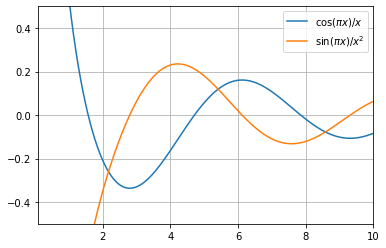

In [8]:
# Example: minimization of f(x) = x^2-3x+2

import math
def f(x):
    return np.cos(x)/x

# See https://www.derivative-calculator.net/
def gradient_f(x):
    return -(x*np.sin(x)+np.cos(x))/(x**2)

xvals = np.arange(0.1, 10, 0.01)
yvals = f(xvals)
plt.plot(xvals, yvals, label="$\cos(\pi x)/x$")
yvals2 = gradient_f(xvals)
plt.plot(xvals, yvals2, label="$\sin(\pi x)/x^2$")
plt.axis([0.1, 10, -0.5, 0.5])
plt.grid(True)
plt.legend()
plt.show()

In [9]:
print(GDA())

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1  1.000000  0.540302 -1.381773  1.000000     0.001
     2  2.381773 -0.304378 -0.161397  1.000000     0.001
     3  2.543171 -0.324880 -0.093765  1.000000     0.001
     4  2.636935 -0.331954 -0.057474  1.000000     0.001
     5  2.694409 -0.334644 -0.036291  1.000000     0.001
     6  2.730700 -0.335725 -0.023328  1.000000     0.001
     7  2.754028 -0.336174 -0.015163  1.000000     0.001
     8  2.769192 -0.336364 -0.009927  1.000000     0.001
     9  2.779118 -0.336446 -0.006528  1.000000     0.001
    10  2.785647 -0.336481 -0.004306  1.000000     0.001
    11  2.789953 -0.336496 -0.002846  1.000000     0.001
    12  2.792799 -0.336503 -0.001884  1.000000     0.001
    13  2.794683 -0.336506 -0.001248  1.000000     0.001
    14  2.795931 -0.336507 -0.000827  1.000000     0.001
    15  2.796758 -0.336508 -0.000548  1.000000     0.001
    16  2.797306 -0.336508 -0.000364  1.000000     0.001
    17  2.797670 -0.336508 -0.0

In [10]:
print(GDA(initial_argmin = 10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1 10.000000 -0.083907  0.062793  1.000000     0.001
     2  9.937207 -0.087706  0.058165  1.000000     0.001
     3  9.879042 -0.090959  0.053625  1.000000     0.001
     4  9.825417 -0.093717  0.049232  1.000000     0.001
     5  9.776185 -0.096038  0.045034  1.000000     0.001
     6  9.731151 -0.097977  0.041062  1.000000     0.001
     7  9.690089 -0.099587  0.037337  1.000000     0.001
     8  9.652753 -0.100917  0.033868  1.000000     0.001
     9  9.618884 -0.102010  0.030658  1.000000     0.001
    10  9.588226 -0.102905  0.027703  1.000000     0.001
    11  9.560523 -0.103635  0.024995  1.000000     0.001
    12  9.535528 -0.104228  0.022521  1.000000     0.001
    13  9.513007 -0.104710  0.020270  1.000000     0.001
    14  9.492737 -0.105101  0.018225  1.000000     0.001
    15  9.474512 -0.105416  0.016373  1.000000     0.001
    16  9.458139 -0.105670  0.014699  1.000000     0.001
    17  9.443440 -0.105875  0.0

In [11]:
print(GDA(min_learning_rate = 1e-10, initial_argmin = 10.0))

 iters    argmin   f(amin)  f'(amin)      rate  min_rate
     1 10.000000 -0.083907  0.062793  1.000000     1e-10
     2  9.937207 -0.087706  0.058165  1.000000     1e-10
     3  9.879042 -0.090959  0.053625  1.000000     1e-10
     4  9.825417 -0.093717  0.049232  1.000000     1e-10
     5  9.776185 -0.096038  0.045034  1.000000     1e-10
     6  9.731151 -0.097977  0.041062  1.000000     1e-10
     7  9.690089 -0.099587  0.037337  1.000000     1e-10
     8  9.652753 -0.100917  0.033868  1.000000     1e-10
     9  9.618884 -0.102010  0.030658  1.000000     1e-10
    10  9.588226 -0.102905  0.027703  1.000000     1e-10
    11  9.560523 -0.103635  0.024995  1.000000     1e-10
    12  9.535528 -0.104228  0.022521  1.000000     1e-10
    13  9.513007 -0.104710  0.020270  1.000000     1e-10
    14  9.492737 -0.105101  0.018225  1.000000     1e-10
    15  9.474512 -0.105416  0.016373  1.000000     1e-10
    16  9.458139 -0.105670  0.014699  1.000000     1e-10
    17  9.443440 -0.105875  0.0